# Monte Carlo Modeling

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown).

## Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import gridspec
import scipy as scipy
from scipy.integrate import quad
from scipy.stats import norm
import sympy as sympy

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Integration and Monte Carlo Modeling

Demonstration of graph creation for simple definite integral:

$$
\begin{align}
F &:= \int_0^\frac{\pi}{2} \sin(x) \dif x.
\end{align}
$$

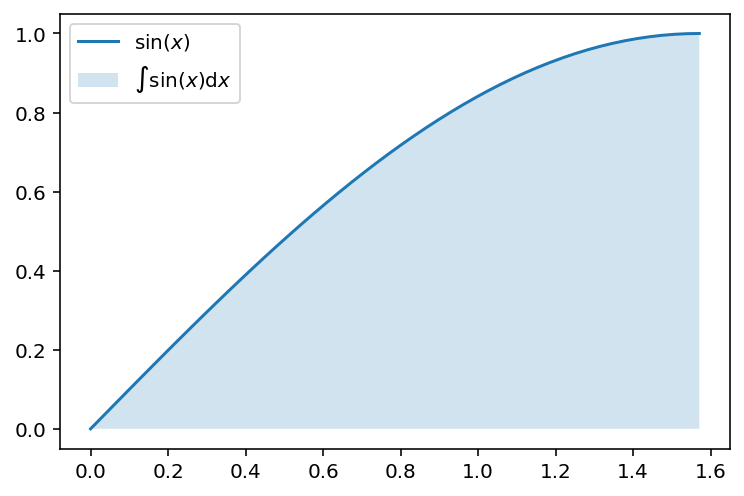

In [2]:
x = np.linspace(0.0, np.pi/2)
f = np.sin(x)

plt.plot(x, f, label=r'$\sin(x)$')
plt.fill_between(x, f, alpha=0.2, label=r'$\int \sin(x) \mathrm{d}x$')
plt.legend()
plt.show()

## Analytic integration
Demonstration of analytic integration:

$$
\begin{align}
\int_0^\frac{\pi}{2} \sin(x) \dif x  &= \left.\cos(x)\Large\right\vert_0^\frac{\pi}{2} = \cos(\tfrac{\pi}{2}) - \cos(0)\\
  &= 1.
\end{align}
$$

In the code below, I had Python work out the solution analytically using the SymPy symbolic mathematics library.

In [3]:
sympy.init_printing(use_latex=True)
x, a, b = sympy.symbols("x a b")
print(sympy.integrate(sympy.sin(x), (x, a, b)))
a = 0
b = sympy.pi
print(sympy.integrate(sympy.sin(x), (x, 0, sympy.pi/2)))

cos(a) - cos(b)
1


## Numerical integration
Analytical integration is not always feasible so in those scenarios, we can fall back to numerical integration techniques. A simple example based on the class exercise is provided below.

### Deterministic quadrature

Quadrature methods (such as a Riemann sum, or the trapazoid or Simpson rules) can be used to evaluate integrals. An implementation of this using SciPy is below.

In [4]:
y, err = quad(scipy.sin, 0, np.pi/2)
print(y)

0.9999999999999999


### Monte Carlo integration

Why do we want to use Monte Carlo? (question 1):

Monte Carlo integration avoids the curse of dimensionality and is therefore a great alternative for high-dimensional problems.

The basic idea of Monte Carlo integration is very simple: it transforms the problem of integration into one of estimating an expected value. The trick is to first construct a random variable whose expected value is equal to our integral of interest. Monte Carlo then estimates this expected value by averaging random realizations of the variable, which in turn approximates the integral.

I will now illustrate how this is possible. First we know that the expected value of a random variable $X$ on the real line can itself be expressed as an integral:

$$
\begin{align}
\E{X} &= \int_\Reals x \, p_X(x) \dif x,
\end{align}
$$

where $X \sim p_X$ is drawn from density $p_X$.

We also know that applying a function ($h$) to a random variable ($X$) gives us another random variable ($Z = h(X)$). We can express its expected value as:

$$
\begin{align}
\E{h(X)} &= \int_\Reals h(x) \, p_X(x) \dif x.
\end{align}
$$

The above equation establishes a link between the expected value of $h(X)$ and an integral involving the function $h$. Unfortunately, this is not quite what we want since the integrand also includes the pdf of the random variable.

We are interested in an integral $\int_\Reals f(x) \dif x$. To handle this, we can simply define our function $h$ to be:

$$
h(x) := \frac{f(x)}{p_X(x)},
$$

which, when inserting into the definition of $\E{h(X)}$ above, gives:

$$
\require{cancel}
\E{h(X)} = \int_\Reals \frac{f(x)}{\cancel{p_X(x)}} \, \cancel{p_X(x)} \dif x = \int_\Reals f(x) \dif x.
$$

We've successfully defined a random variable ($Z = \frac{f(X)}{p_X(X)}$) whose expected value is equal to our integral of interest. Estimating this expected value by simply averaging $n$ independent evaluations of $Z$ gives rise to the standard Monte Carlo estimator:

$$
\begin{align}
F_n &= \frac{1}{n}\sum_{i=1}^{n} \frac{f(x_i)}{p_X(x_i)} \approx F
\end{align}
$$

## Monte Carlo estimator

Here we use Monte Carlo to approximate the definite integral from before,

$$
\begin{align}
F &:= \int_a^b f(x) \dif x,
\end{align}
$$

where $f(x) = \sin(x)$ and $a = 0$ and $b=\frac{\pi}{2}$.

We know from above that the analytic answer to this integral is simply $F = 1$.



Reference the mathematical equation I've written below for the standard Monte Carlo estimator of this integral using $n$ samples.

pdf = 1 (assume uniform distribution)

range = 0 to $\frac{\pi}{2}$

$
F_n=(b-a)\frac1n \sum_{i=1}^{n} \frac{f(x_i)}{p(x_i)}
= (\frac{\pi}{2}-0)\frac1n \sum_{i=1}^{n} \frac{sin(x)}{1}
= \frac{\pi}{2n}\sum_{i=1}^{n} sin(x)
$


In [5]:
# test code
N = 100
a = 0
b = np.pi/2
xs = a + np.random.rand(N)*(b-a)
F = (b-a) * np.mean(np.sin(xs))
print(F)

0.9920046765002206


#### Visually exploring the Monte Carlo estimator

The code below implements this Monte Carlo estimator. It evaluates the Python function `h(x)` (that we defined previously) $n$ times, for $n \in \{4^1, 4^2, \ldots, 4^{10}\}$, and prints their mean (the estimate $F_n \approx F$), as well as the absolute error ($\vert F_n - F\vert$):

In [6]:
def h(x):
    return np.pi * 0.5 * np.sin(np.pi * x * 0.5)

# Monte Carlo integration
print(f'{"n":>11} {"F_n":9} {"|F_n-F|":8}')
for n in 4**np.array([1,2,3,4,5,6,7,8,9,10]):
    x   = np.random.uniform(0, 1, n)
    hx  = h(x)
    sol = np.mean(hx)
    print(f'{n:11d} {sol:+1.6f} {np.abs(sol-1):1.6f}')

          n F_n       |F_n-F| 
          4 +0.733299 0.266701
         16 +0.881799 0.118201
         64 +0.914647 0.085353
        256 +0.980769 0.019231
       1024 +1.006134 0.006134
       4096 +1.000086 0.000086
      16384 +0.997624 0.002376
      65536 +1.000307 0.000307
     262144 +0.999969 0.000031
    1048576 +0.999601 0.000399


Reflection and Justification: The Monte Carlo estimator is clearly an approximation (it is a random variable after all), but the approximation also seems to generally get better as $n$ increases. We visualize this more explicitly in the code below by plotting the estimator $F_n$ as a function of $n$ for increasing values of random samples $n \in [1, 100]$.

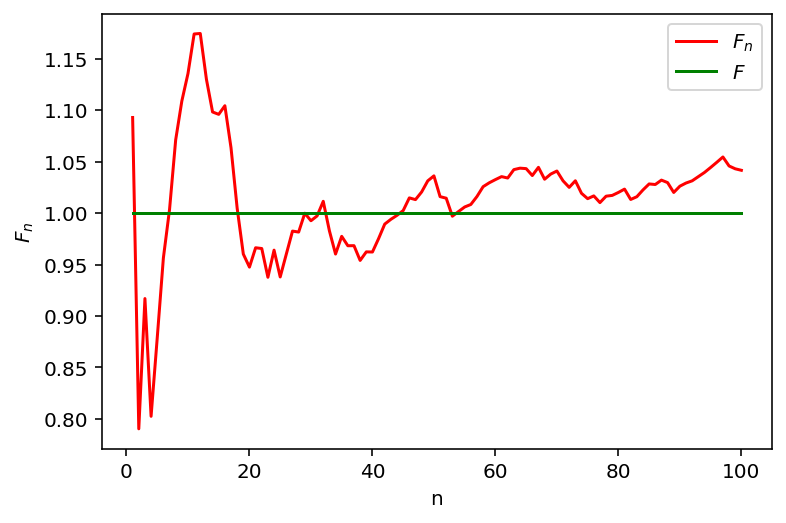

In [7]:
n = 100
x = h(np.random.random(n))
y = 1/np.arange(1, n+1) * np.cumsum(x, axis=0)

plt.plot(np.arange(1, n+1), y, c='r', label=r'$F_n$')
plt.plot(np.arange(1, n+1), np.ones(n), c='g', label=r'$F$')
plt.xlabel(r'n')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

By running the above code fragment several times, we can see that the trend is for the graph to start off rather chaotic, but, on average, it slowly starts approaching the correct value of $1$ for increasing $n$. Note that the approximation doesn't strictly improve as $n$ increases (it does not monotonically approach $1$, but fluctuates around this value). It is only on average that the error decreases.

I elected to visualize this average trend more explicitly by simulating many replicates of the Monte Carlo estimator and plotting all the replicates together. The code fragment below runs and plots 1000 such replicates.

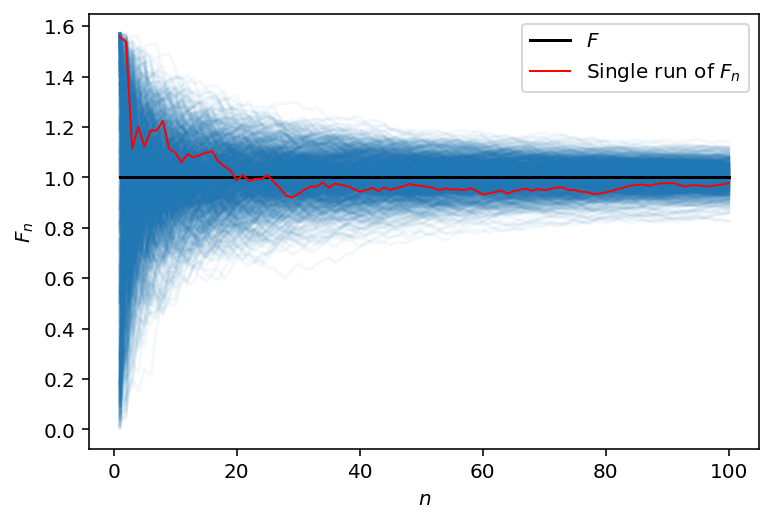

In [8]:
n = 100
runs = 1000

x = h(np.random.random((n, runs)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

# plot the 1000 independent runs in semitransparent blue
plt.plot(np.arange(1, n+1), y, c="C0", alpha=0.05)
# plot the ground truth value in black
plt.plot(np.arange(1, n+1), np.ones(n), '-k', label=r'$F$')
# highlight a single replicate in red
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1, label=r'Single run of $F_n$');
plt.xlabel(r'$n$')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

As we can see, the spread of the 1000 replicates starts off large, but the blue cloud of uncertainty around the ground truth value gradually shrinks as $n$ increases.

# Part 4: Convergence rate of the Monte Carlo estimator

Improved method for determining convergence behavior (discussed this with the graduate TA during office hours):

Running multiple replicates like above is one way to analyze the error of a Monte Carlo process. It is, however, quite time consuming since it requires running many simulations. Thus we can turn to the central limit theorem to derive and explore a more concrete expression for the convergence behavior of this estimator.

The Monte Carlo estimator $F_n$ is the average of $n$ independent and identically distributed (i.i.d.) random numbers. Being a random variable itself, we can therefore reason about the variance, $\V{F_n}$, of $F_n$. The vertical extent of the blue cloud in the graph above is in fact a visualization of this variance (or rather the standard deviation, the square root of variance).

We will now formalize this by considering the central limit theorem  again, but this time for the *average* of $n$ i.d.d. random variables $Z_i$ for $i = 1\ldots n$:

$$
F_n = \frac{1}{n}\sum_{i=1}^{n} Z_i.
$$

## Problem 4.1: Variance of an average

The following is a very simple Python function to compute $\V{F_n}$ in terms of $n$ and the variance of $Z$, $\V{Z} = \V{F_1}$.


In [9]:
def variance_of_average(n, varZ):
    return (1/n) * varZ

## Problem 4.2: Convergence to the normal distribution

We pass random variables $Z = h(X)$ (not uniform), compute the *average* of these $n$ random values, and estimate the parameters of the normal distribution, use $\mu = 1$ and a variance computed using the `variance_of_average(n,varZ)` function with `varZ = 0.23`.


interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

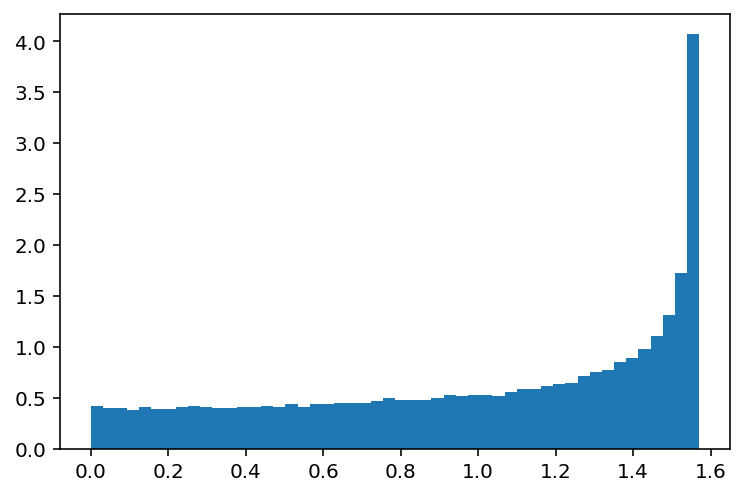

In [10]:
@interact(n=(1, 20))
def central_limit_theorem_average(n=1):
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 1, 1)
    
    # generate samples, this time a 100000 x n matrix
    samples = h(np.random.uniform(size=(100000,n)))

    # sum up the elements in each column
    means = np.mean(samples, axis=1)

    # plot the normalized histogram
    _, x, _ = plt.hist(means, bins=50, density=True, stacked=True, label='My histogram')
    
    mu = 1
    variance = variance_of_average(n,0.23)
    sigma = np.sqrt(variance) # converts variance to std dev
    n2 = normal_distr(x[:-1], mu, sigma)
    plt.plot(x[:-1], n2, '-g.', label='My normal')
    
    # Display the figure
    plt.title("Central Limit Theorem")
    plt.legend()
    plt.show()


### Observations and Insights

For each value of $n$, the resulting histogram appears to visualize the "spread" of many evaluations of $F_n$ (the *horizontal* blue histogram here corresponds to the *vertical* spread of the blue $F_n$ replicate runs in our previous plot).

By playing around with the slider, we can see that for $n=1$ the distribution of $F_1$ is clearly asymmetric and not normal. Nevertheless, as we increase $n$, the histogram of the average $F_n$ increasingly matches the normal distribution which also becomes increasingly concentrated around the correct answer to our integral $F = 1$.

How can we reduce error?-
The visualization and `variance_of_average(n, varZ)` function above indicate that the variance of Monte Carlo integration, $\V{F_n} = \frac{\V{Z}}{n}$, is a function of two things: 1) the number of samples $n$ being averaged, and 2) the variance of a single sample $Z = \frac{f(X)}{p_X(X)}$. This suggests we can reduce error either by increasing $n$, or by drawing our samples $X$ from a distribution $p_X$ that is more "similar to" the integrand $f$, which in turn reduces the variance of $Z$ (a process known as importance sampling which we'll explore next).

Since Monte Carlo variance is $O(n^{-1})$, the error (square root of variance, or *standard deviation*) is hence on the order of $O\left(n^{-\frac{1}{2}}\right)$ for work of $O(n)$. I demonstrate this convergence rate more explicitly below by plotting the standard deviation of $F_n$ on a log-log scale (as per the graduate TA's suggestion), where a function like $n^{-\frac{1}{2}}$ should look like a straight line with slope $-\frac{1}{2}$.

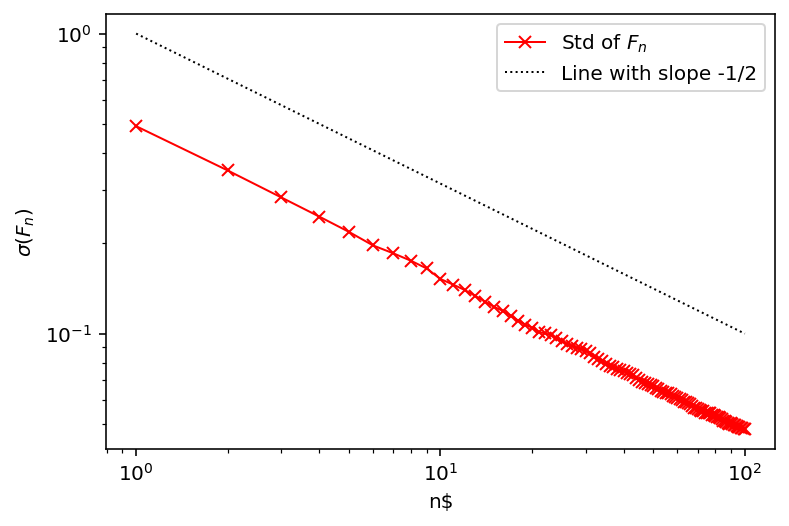

In [11]:
n = 100
runs = 1000

x = h(np.random.random((n, runs)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

n = np.arange(1, n+1)
plt.loglog(n, np.std(y, axis=1, ddof=1), marker='x', c='red', linewidth=1, label=r'Std of $F_n$');
plt.loglog(n, n**(-0.5), ':k', linewidth=1, label=r'Line with slope -1/2');
plt.legend()
plt.xlabel(r'n$')
plt.ylabel(r'$\sigma(F_n)$')
plt.show()

While for this example we considered a simple $1d$ integral, this convergence rate holds for arbitrarily $d$.